Problem statement: We are given Gender, age along with salary and we have to predict whether they will buy the SUV car or not.Data

Data contains 5 columns.

UserID - Each person has a unique ID from which we can identify the person uniquely.

Gender - Person can male or female. This field is very important for our hypothesis.

Age - Age of the person. Because our product can be useful to some ages only.

EstimatedSalary - This column contains salary of a person as salary can affect the shopping of a person.

Purchased - Contains two numbers ‘0’ or ‘1’. ‘0’ means not purchased and ‘1’ means purchased.This variable is our dependent variable.

**Uploading Dataset**





In [ ]:
from google.colab import files
file = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


**Reading Dataset**

In [ ]:
import pandas as pd
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Dataset Information** 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Converting categorical data to numerical data**

In [ ]:
df['Gender'].replace(to_replace=['Male', 'Female'], value=[1,2], inplace=True)

**Dropping Column**

In [ ]:
df.drop(columns=['User ID'],axis =1,inplace=True)

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0


 **Dataset Description** 

In [ ]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,1.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,1.000000,18.000000,15000.000000,0.000000
25%,1.000000,29.750000,43000.000000,0.000000
50%,2.000000,37.000000,70000.000000,0.000000
75%,2.000000,46.000000,88000.000000,1.000000
max,2.000000,60.000000,150000.000000,1.000000


**Correlation**

In [ ]:
cor = df.corr()
cor

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


<function matplotlib.pyplot.show>

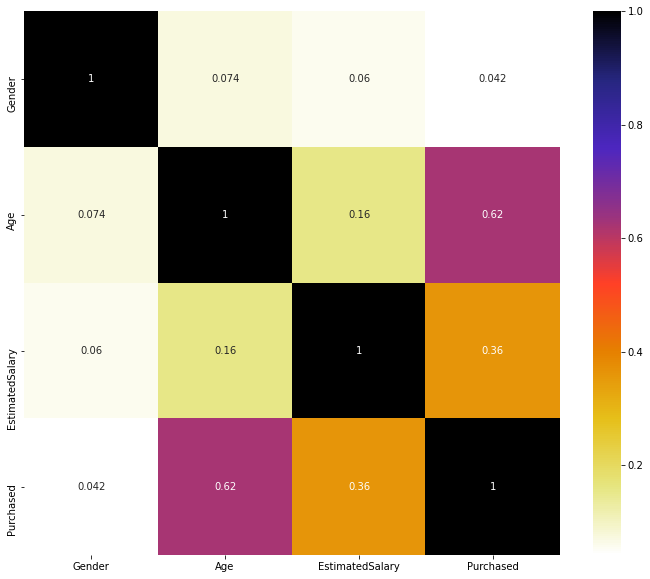

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(cor, annot= True, cmap=plt.cm.CMRmap_r)
plt.show

**Plotting Different types of graphs for data analysis**

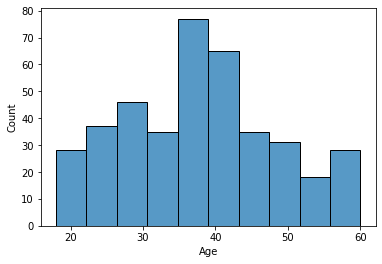

In [ ]:
import seaborn as sns
sns.histplot(data = df, x = 'Age', bins = 'auto')

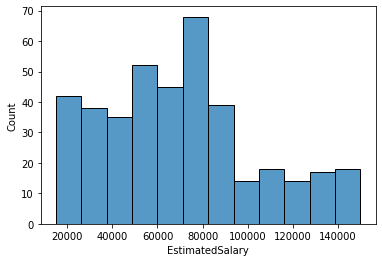

In [ ]:
sns.histplot(data = df, x = 'EstimatedSalary', bins = 'auto')

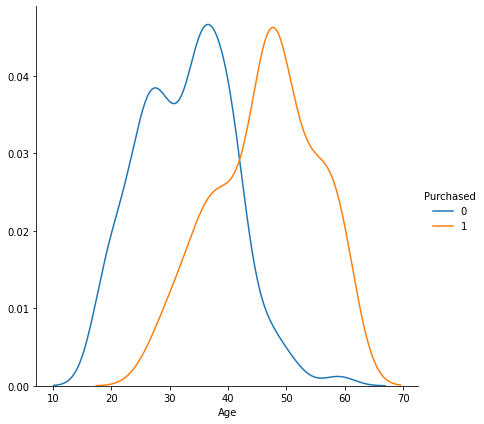

In [ ]:
sns.FacetGrid(df, hue = 'Purchased', height = 6).map(sns.kdeplot, 'Age').add_legend()

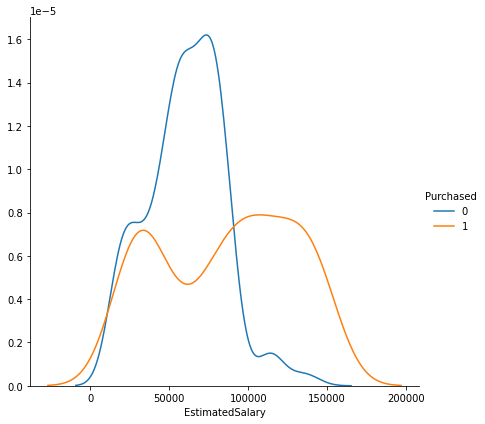

In [ ]:
sns.FacetGrid(df, hue = 'Purchased', height = 6).map(sns.kdeplot, 'EstimatedSalary').add_legend()

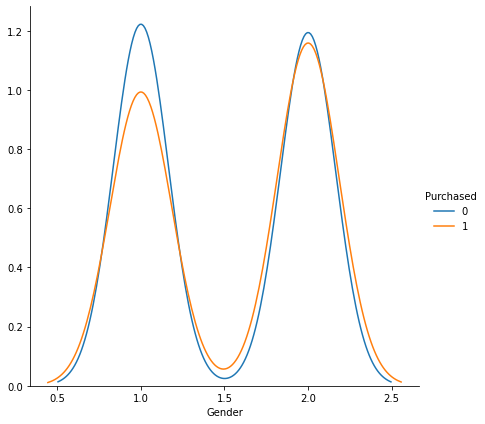

In [ ]:
sns.FacetGrid(df, hue = 'Purchased', height = 6).map(sns.kdeplot, 'Gender').add_legend()

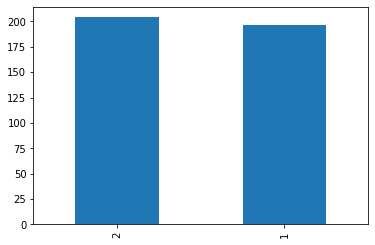

In [ ]:
df['Gender'].value_counts().plot(kind='bar')

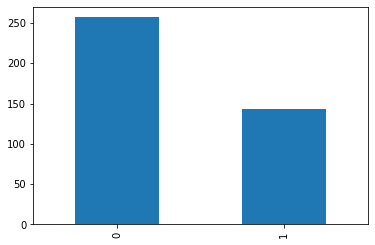

In [ ]:
df['Purchased'].value_counts().plot(kind='bar')

**Model Training Steps. Creating Feature columns and Target column**

In [ ]:
feature_cols = ['Gender','Age','EstimatedSalary']
X = df[feature_cols]
y = df['Purchased']

**Creating training and testing dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
X_test

,Gender,Age,EstimatedSalary
349,1,38,61000
380,1,42,64000
387,1,39,71000
241,1,38,59000
190,1,24,84000
369,2,54,26000
347,2,54,108000
110,2,39,71000
8,1,25,33000
177,1,25,22000


In [ ]:
y_test

349    0
380    0
387    0
241    0
190    0
369    1
347    1
110    0
8      0
177    0
6      0
36     0
273    1
354    1
142    0
72     0
123    0
17     1
345    0
157    0
231    0
71     0
46     0
301    1
237    0
341    0
52     0
141    0
51     0
239    1
19     1
144    0
207    0
306    0
267    0
101    0
70     0
162    0
310    0
287    1
Name: Purchased, dtype: int64

**X_train and y_train**

In [ ]:
X_train

,Gender,Age,EstimatedSalary
305,1,42,54000
80,1,30,80000
41,2,33,51000
317,1,35,55000
40,2,27,17000
...,...,...,...
384,2,57,33000
25,1,47,20000
1,1,35,20000
357,2,41,72000


In [ ]:
y_train

305    0
80     0
41     0
317    0
40     0
      ..
384    1
25     1
1      0
357    0
228    0
Name: Purchased, Length: 360, dtype: int64

# 1. Decision Tree

In [ ]:
from sklearn import tree

tr = tree.DecisionTreeClassifier()
tr.fit(X_train, y_train)
y_pred = tr.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1])

**Cross Validation**

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 10)
tr = tree.DecisionTreeClassifier()
tr.fit(X_train, y_train)
results = model_selection.cross_val_score(tr, X_train, y_train, cv = kfold)
results

array([0.91666667, 0.80555556, 0.88888889, 0.88888889, 0.83333333,
       0.80555556, 0.86111111, 0.83333333, 0.86111111, 0.80555556])

**Accuracy**

In [ ]:
from sklearn import  metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.85


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        31
           1       0.62      0.89      0.73         9

    accuracy                           0.85        40
   macro avg       0.79      0.86      0.81        40
weighted avg       0.88      0.85      0.86        40



**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[26  5]
 [ 1  8]]


**Predicting New Data**

In [ ]:
New_Buyer = [[2, 30, 35000]]

In [ ]:
tr.predict(New_Buyer)

array([0])

## 2. Random Forest Classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

**Cross Validation**

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 10)
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
results = model_selection.cross_val_score(rf, X_train, y_train, cv = kfold)
results

array([0.91666667, 0.77777778, 0.88888889, 0.86111111, 0.88888889,
       0.83333333, 0.86111111, 0.94444444, 0.91666667, 0.88888889])

**Accuracy**

In [ ]:
from sklearn import  metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.925


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.80      0.89      0.84         9

    accuracy                           0.93        40
   macro avg       0.88      0.91      0.90        40
weighted avg       0.93      0.93      0.93        40



**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[29  2]
 [ 1  8]]


**Predicting New Data**

In [ ]:
New_Buyer = [[1, 42, 150000]]

In [ ]:
rf.predict(New_Buyer)

array([1])

## 3. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

**Cross Validation**

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 10)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
results = model_selection.cross_val_score(gnb, X_train, y_train, cv = kfold)
results

array([0.97222222, 0.77777778, 0.86111111, 0.88888889, 0.88888889,
       0.88888889, 0.86111111, 0.91666667, 0.94444444, 0.86111111])

**Accuracy**

In [ ]:
from sklearn import  metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.78      0.78      0.78         9

    accuracy                           0.90        40
   macro avg       0.86      0.86      0.86        40
weighted avg       0.90      0.90      0.90        40



**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[29  2]
 [ 2  7]]


**Predicting New Data**

In [ ]:
New_Buyer = [[1, 30, 45000]]

In [ ]:
gnb.predict(New_Buyer)

array([0])

## 4. Support Vector Machine SVM

In [ ]:
from sklearn import preprocessing
from sklearn.svm import SVC

svm = SVC(kernel ='linear')
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1])

**Cross Validation**

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 10)
svm = SVC(kernel ='linear')
svm.fit(X_train, y_train)
results = model_selection.cross_val_score(svm, X_train, y_train, cv = kfold)
results

array([0.91666667, 0.75      , 0.72222222, 0.88888889, 0.88888889,
       0.91666667, 0.75      , 0.75      , 0.83333333, 0.83333333])

**Accuracy**

In [ ]:
from sklearn import  metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.85


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        31
           1       0.64      0.78      0.70         9

    accuracy                           0.85        40
   macro avg       0.78      0.82      0.80        40
weighted avg       0.86      0.85      0.86        40



**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[27  4]
 [ 2  7]]


**Predicting New Data**

In [ ]:
New_Buyer = [[2, 50, 100000]]

In [ ]:
svm.predict(New_Buyer)

array([1])